# Parametric vs. non-parametric

### Example

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the campaign data
def analyze_campaign_data():
    
    # Simulated campaign data
    campaign_a = np.array([45, 42, 36, 39, 51, 44, 58, 35, 120, 40, 48, 37, 
                          46, 41, 43, 39, 250, 200, 150, 42])
    campaign_b = np.array([52, 48, 42, 45, 48, 46, 49, 44, 45, 42, 41, 47, 
                          44, 40, 45, 43, 42, 44, 45, 46])
    
    print("Step 1: Initial Data Exploration")
    print("-" * 50)
    
    print("Campaign A Summary:")
    print(f"Mean: ${np.mean(campaign_a):.2f}")
    print(f"Median: ${np.median(campaign_a):.2f}")
    print(f"Standard Deviation: ${np.std(campaign_a):.2f}\n")
    
    print("Campaign B Summary:")
    print(f"Mean: ${np.mean(campaign_b):.2f}")
    print(f"Median: ${np.median(campaign_b):.2f}")
    print(f"Standard Deviation: ${np.std(campaign_b):.2f}\n")

    
    # Check normality
    print("Step 2: Testing Normality Assumption")
    print("-" * 50)
    _, p_value_a = stats.shapiro(campaign_a)
    _, p_value_b = stats.shapiro(campaign_b)
    
    print(f"Shapiro-Wilk test p-values:")
    print(f"Campaign A: {p_value_a:.4f}")
    print(f"Campaign B: {p_value_b:.4f}\n")

    
    # Visual check of distributions
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(campaign_a, ax=ax1, bins=10)
    ax1.set_title('Campaign A Distribution')
    sns.histplot(campaign_b, ax=ax2, bins=10)
    ax2.set_title('Campaign B Distribution')
    plt.show()

    
    # Check homogeneity of variance
    print("Step 3: Testing Homogeneity of Variance")
    print("-" * 50)
    _, p_value_levene = stats.levene(campaign_a, campaign_b)
    print(f"Levene's test p-value: {p_value_levene:.4f}\n")

    
    # Handle violation of assumptions
    if p_value_a < 0.05 or p_value_b < 0.05:
        print("Step 4: Handling Non-normality")
        print("-" * 50)
        print("Normality assumption violated. Attempting log transformation...")
        
        # Log transform the data
        campaign_a_log = np.log(campaign_a)
        campaign_b_log = np.log(campaign_b)
        
        # Check normality of transformed data
        _, p_value_a_log = stats.shapiro(campaign_a_log)
        _, p_value_b_log = stats.shapiro(campaign_b_log)
        
        print("\nShapiro-Wilk test after log transformation:")
        print(f"Campaign A: {p_value_a_log:.4f}")
        print(f"Campaign B: {p_value_b_log:.4f}")
        
        if p_value_a_log < 0.05 or p_value_b_log < 0.05:
            print("\nTransformation unsuccessful. Recommending non-parametric test.")
            # Perform Mann-Whitney U test (Non-parametric test)
            stat, p_value = stats.mannwhitneyu(campaign_a, campaign_b, 
                                             alternative='two-sided')
            print(f"\nMann-Whitney U test p-value: {p_value:.4f}")
        else:
            # Perform t-test on transformed data
            stat, p_value = stats.ttest_ind(campaign_a_log, campaign_b_log)
            print(f"\nt-test on transformed data p-value: {p_value:.4f}")
    else:
        # Perform regular t-test if assumptions are met
        stat, p_value = stats.ttest_ind(campaign_a, campaign_b)
        print("All assumptions met. Performing standard t-test.")
        print(f"t-test p-value: {p_value:.4f}")

Step 1: Initial Data Exploration
--------------------------------------------------
Campaign A Summary:
Mean: $70.30
Median: $43.50
Standard Deviation: $59.37

Campaign B Summary:
Mean: $44.90
Median: $45.00
Standard Deviation: $2.86

Step 2: Testing Normality Assumption
--------------------------------------------------
Shapiro-Wilk test p-values:
Campaign A: 0.0000
Campaign B: 0.7341



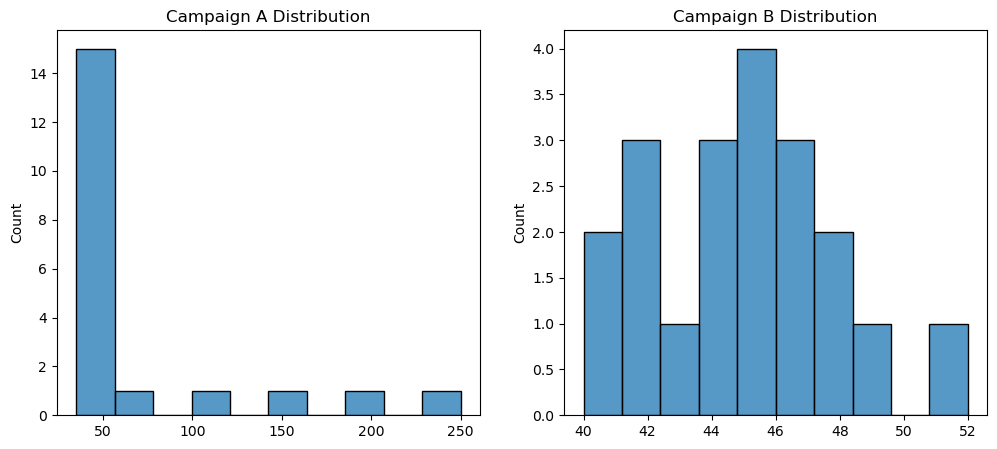

Step 3: Testing Homogeneity of Variance
--------------------------------------------------
Levene's test p-value: 0.0355

Step 4: Handling Non-normality
--------------------------------------------------
Normality assumption violated. Attempting log transformation...

Shapiro-Wilk test after log transformation:
Campaign A: 0.0000
Campaign B: 0.8946

Transformation unsuccessful. Recommending non-parametric test.

Mann-Whitney U test p-value: 0.6544


In [3]:
# Run the analysis
analyze_campaign_data()

Based on this analysis, I found no significant difference in mean purchase amount between the two marketing campaigns (p > 0.05), however, there were several considerably large outlier purchase amounts for campaign A that warrant a further analysis into as special customer cases

NOTE: The relatively small sample sizes of simulated data (for demonstration purposes) might not be enough to detect a significant difference at any meaningful level here but are useful in highlighting data that does not meet our necessary assumptions.